### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
### P5: Procesos M/M/s

- Estudiante1: **Emmanuel Carballo Vargas**
- Carné1: **B41424**

- Estudiante2: **Francinny Marín Sibaja**
- Carné2: **B74459**

- Estudiante3: **Jose Hidalgo Castro**
- Carné3: **B63466**
- Grupo: **15**


## 1. Parte a:

Del enunciado se obtienen los siguientes datos:
- $\lambda$ = 7 personas/minuto
- $\nu$ = 0.25 personas/minuto
- El sistema no debe exceder 100 personas en fila durante el 95% del tiempo de servicio $\Rightarrow$ i = 100. 

De manera que, se logra reconocer que es un proceso **M/M/s**, dado que se requiere que el sistema no exceda 100 personas en fila durante el 95% de tiempo, entonces:

$$
P( \text{101 o } ) = \sum_{i=101}^{\infty} (1 - \rho) \rho^i  = 1 - \sum_{i=0}^{100} (1 - \rho) \rho^i = \rho^{100}
$$

Ahora, se sabe que $\rho = \lambda/s\nu$, además, se requiere una probabilidad menor o igual al 5% (esto debido a que se busca que el 95% del tiempo no se exceda una cantidad de 100 personas en fila), por lo que se tiene que:

$$
\begin{aligned}
P( \text{101 o más clientes en el sistema} ) = \rho^{100} & = \left( \frac{\lambda}{s\nu} \right)^{100} \leq 0.05 \\
\Rightarrow s^{100} & \geq \frac{\lambda^{100}}{0.05\nu^{100}} = \frac{7^{100}}{0.05\cdot 0.25^{100}} \quad \Rightarrow \quad s \geq \sqrt[100]{\frac{7^{100}}{0.05\cdot 0.25^{100}} } \Rightarrow s \geq 28.85 \approx 29 
\end{aligned}
$$

Por lo que para cumplir el requisito se requieren de al menos 29 servidores.







## 2. Parte b:

En esta sección se modifica el código provisto para simular y corroborar el resultado anterior, además se crean dos gráficas que muestran dicha simulación.


Se requiere una cantidad de 29 servidores para cumplir con los requerimientos.

Simulación para 29 servidores
Parámetro lambda = 7.0
Parámetro nu*s = 7.25
Tiempo con más de 100 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.16 horas.


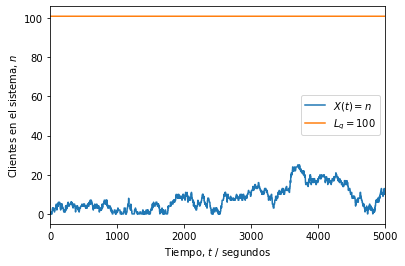

Simulación para 26 servidores
Parámetro lambda = 7.0
Parámetro nu*s = 6.5
Tiempo con más de 100 solicitudes en fila:
	 67.38%
	 No cumple con la especificación.
Simulación es equivalente a 8.74 horas.


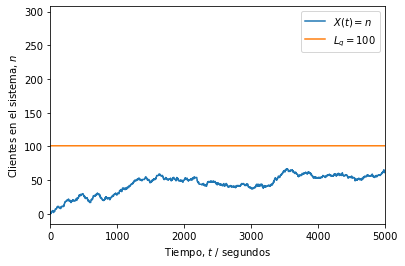

In [1]:

import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

def total_servidores(personas_fila, tasa_llegada, tasa_partida, porcentaje_tiempo, servidores):
    
    # indices a usar en las sumatorias
    sumatoria_2 = 0
    sumatoria_1 = 0

    # Probabilidad de estado cero
    phi_0 = 0

    while sumatoria_1 < porcentaje_tiempo:

        # Se calcula el rho
        rhoo = tasa_llegada/(servidores*tasa_partida)

        # Manejo de excepciones --> division por cero
        try:
            x = pow(servidores*rhoo,servidores)/(math.factorial(servidores)*(1-rhoo))
        except:
            x = pow(servidores*rhoo,servidores)/(math.factorial(servidores)*(0.0000001))

        k = 0;
        sumatoria_2 = 0 # Se reinicia la sumatoria

        # Se realiza la sumatoria de Phi_0
        while k <= (servidores-1):
            sumatoria_2 = sumatoria_2 + ((pow(servidores*rhoo,k))/(math.factorial(k)))
            k = k + 1 # Se incrementa el índice k

        phi_0 = 1/(sumatoria_2 + x) # Se calcula Phi_0

        i = 0
        sumatoria_1 = 0 # Se reinicia la sumatoria 

        # Sumatoria de la probabilidad de que el estado en el sistema esté por debajo de 100 personas
        while i < servidores:
            y1 = pow(servidores*rhoo,i)/(math.factorial(i))
            sumatoria_1 = sumatoria_1 + y1*phi_0
            i = i + 1

        while i >= servidores and i <= (personas_fila + servidores):
            y2 = (pow(servidores,servidores)*pow(rhoo,i))/(math.factorial(servidores))
            sumatoria_1 = sumatoria_1 + y2*phi_0
            i = i + 1

        servidores = servidores+1; # Se incrementa en 1 el número de servidores
    print("Se requiere una cantidad de {} servidores para cumplir con los requerimientos.".format(servidores-2))
    
def graficas(N, lam, nu_s):

    # Distribución de los tiempos de llegada entre cada cliente
    X = stats.expon(scale = 1/lam)

    # Distribución de los tiempos de servicio a cada cliente
    Y = stats.expon(scale = 1/nu_s)

    # Intervalos entre llegadas (segundos desde último cliente)
    t_intervalos = np.ceil(X.rvs(N)).astype('int')

    # Tiempos de las llegadas (segundos desde el inicio)
    t_llegadas = [t_intervalos[0]]
    for i in range(1, len(t_intervalos)):
        siguiente = t_llegadas[i-1] + t_intervalos[i]
        t_llegadas.append(siguiente)

    # Tiempos de servicio (segundos desde inicio de servicio)
    t_servicio = np.ceil(Y.rvs(N)).astype('int')

    # Inicialización del tiempo de inicio y fin de atención
    inicio = t_llegadas[0]          # primera llegada
    fin = inicio + t_servicio[0]    # primera salida

    # Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
    t_atencion = [inicio]
    for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

    # Inicialización del vector temporal para registrar eventos
    t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

    # Asignación de eventos de llegada (+1) y salida (-1) de clientes
    for c in range(N):
        i = t_llegadas[c]
        t[i] += 1
        j = t_atencion[c] + t_servicio[c]
        t[j] -= 1

    # Umbral de P o más personas en sistema (hay P - 1 en fila)
    P = 102

    # Instantes (segundos) de tiempo con P o más solicitudes en sistema
    exceso = 0

    # Proceso aleatorio (estados n = {0, 1, 2...})
    Xt = np.zeros(t.shape)

    # Inicialización de estado n
    n = 0

    # Recorrido del vector temporal y conteo de clientes (estado n)
    for i, c in enumerate(t):
        n += c # sumar (+1) o restar (-1) al estado
        Xt[i] = n
        if Xt[i] >= P: 
            exceso += 1

    # Fracción de tiempo con P o más solicitudes en sistema
    fraccion = exceso / len(t)

    # Resultados
    print('Parámetro lambda =', str(lam*60))
    print('Parámetro nu*s =', str(nu_s*60))
    print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
    print('\t {:0.2f}%'.format(100*fraccion))
    if fraccion <= 0.01:
        print('\t Sí cumple con la especificación.')
    else:
        print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

    # Gráfica de X(t) (estados del sistema)
    plt.figure()
    plt.plot(Xt)
    plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
    plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
    plt.ylabel('Clientes en el sistema, $n$')
    plt.xlabel('Tiempo, $t$ / segundos')
    plt.xlim((0, 5000))
    plt.show()


# Se llama a las funciones con distintos parámetros:
total_servidores(100, 7, 0.24, 0.95, 1)
print()
print('Simulación para 29 servidores')
graficas(3200, 7/60, 7.25/60)

print('Simulación para 26 servidores')
graficas(3200, 7/60, 6.5/60)
